# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

### Iris Dataset

In [2]:
path_to_repo = '/Users/ruben/repo/personal/ga/DAT-23-NYC/'

In [3]:
column_headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(path_to_repo + 'data/iris/iris.csv', header=None, names=column_headers)
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


<hr>
## Exercises

- Make a classifier for virginicas using logistic regression (i.e., only predicting 1 for verginicas and 0 otherwise), **only** using petal's width and length
- Train and test of the model using cross validation
- What is a good baseline for accuracy (i.e., how would the naive classifier score)?
- What is the model's precision, recall, and F1 score, aside from its accuracy?
- (\*) What is the model's AUC (Area Under the ROC Curve)?
- (\*\*) Plot the flower's petal width and length and draw the decision boundary

In [4]:
data['virginica'] = data.species == 'virginica'
features = ['petal_length', 'petal_width']
X, y = data[features], data.virginica
model = LogisticRegression().fit(X, y)
print 1 - y.mean(), "baseline (always predicting False)"
print cross_val_score(model, X, y, cv=10).mean()
print cross_val_score(model, X, y, cv=10, scoring='precision').mean()
print cross_val_score(model, X, y, cv=10, scoring='recall').mean()
print cross_val_score(model, X, y, cv=10, scoring='f1').mean()
print cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

0.666666666667 baseline (always predicting False)
0.946666666667
0.92619047619
0.94
0.921464646465
0.983


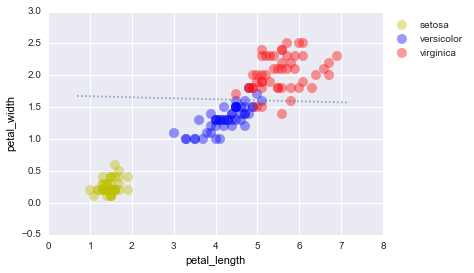

In [5]:
x1, x2 = features
colors = list("rby")

# Plot the flowers with color labels
for spec in data.species.unique():
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x1], data_spec[x2], label=spec, c=colors.pop(),
                linewidths=0, s=100, alpha=.4)
    
# draw the decision boundary
boundary_x1 = np.array([data[x1].min() - .3, data[x1].max() + .3])
boundary_x2 = -(model.intercept_ + model.coef_[0, 0] * boundary_x1) / model.coef_[0, 1]
f = plt.plot(boundary_x1, boundary_x2, ':')
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.xlabel(x1), plt.ylabel(x2)